**Scenario**
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

**Goal**
Evaluate A/B testing results and decide which marketing strategy works the best.

**Columns**

MarketID: unique identifier for market

MarketSize: size of market area by sales

LocationID: unique identifier for store location

AgeOfStore: age of store in years

Promotion: one of three promotions that were tested

week: one of four weeks when the promotions were run

SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

read the dataset

In [2]:
df = pd.read_csv("/kaggle/input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")

* **Basic Data Analysis**
Get some information About the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


Find the unique columns

In [4]:
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

There are three different Market Size and three different promotion types performed. Lets check for Nans or missing values

In [5]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Create a new variable - Sales/(Age of store) to see if there is a relation with promotion and Market Size

In [6]:
df['sales_age_store']=df['SalesInThousands']/df['AgeOfStore']

In [7]:
df.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,sales_age_store
0,1,Medium,1,4,3,1,33.73,8.4325
1,1,Medium,1,4,3,2,35.67,8.9175
2,1,Medium,1,4,3,3,29.03,7.2575
3,1,Medium,1,4,3,4,39.25,9.8125
4,1,Medium,2,5,2,1,27.81,5.5620


In [8]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands,sales_age_store
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204,15.659482
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216,20.053691
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000,1.532000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000,4.046071
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000,6.850833
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500,16.578667
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000,97.610000


* **Data Visualization**

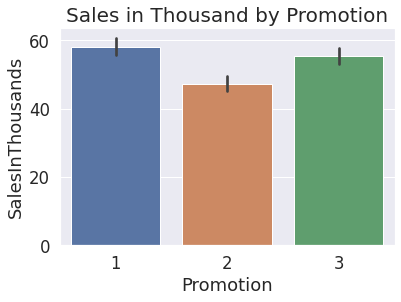

In [9]:
#Total Sales - Overall Dataset
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='SalesInThousands', data=df)
plt.title("Sales in Thousand by Promotion", fontdict={'fontsize': 20})
plt.show()

At overall level, Sales in Promotion Type 1 and 3 are very similar compared to Sales in Promotion Type 2. We can drill down further to see the impact with respect to MarketSize

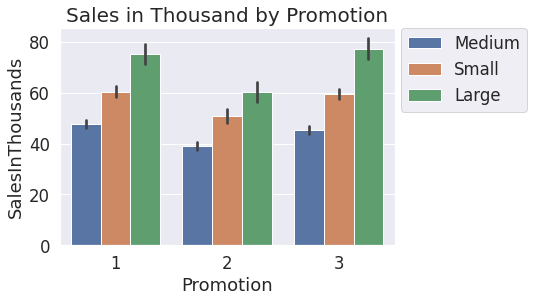

In [10]:
#Total Sales - By MarketSize
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='SalesInThousands', data=df, hue='MarketSize')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Sales in Thousand by Promotion", fontdict={'fontsize': 20})
plt.show()

Splitting by Marketsize also provides a similar results. Lets look at another dimension- Age of Store and Promotion Type

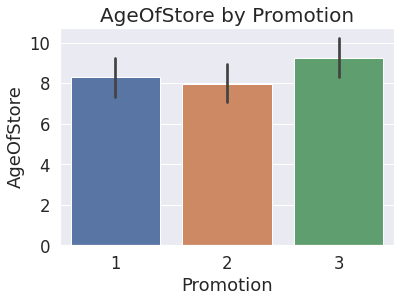

In [11]:
#Age of Store - Overall Dataset
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='AgeOfStore', data=df)
plt.title("AgeOfStore by Promotion", fontdict={'fontsize': 20})
plt.show()


The stores on which Promotion 1 and 2 have been targetted have similar age compare to Promotion 3. We can also analyse the difference by marketsize

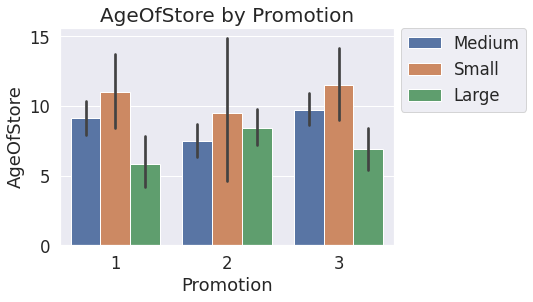

In [12]:
#Age of Store - By MarketSize
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='AgeOfStore', data=df, hue='MarketSize')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("AgeOfStore by Promotion", fontdict={'fontsize': 20})
plt.show()

Lets look at the effect of promotion by sales of the store

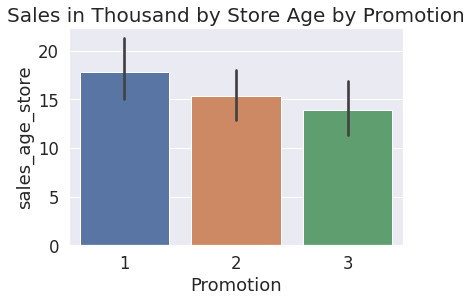

In [13]:
#Sales by Age of Store - Overall Dataset
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='sales_age_store', data=df)
plt.title("Sales in Thousand by Store Age by Promotion", fontdict={'fontsize': 20})
plt.show()

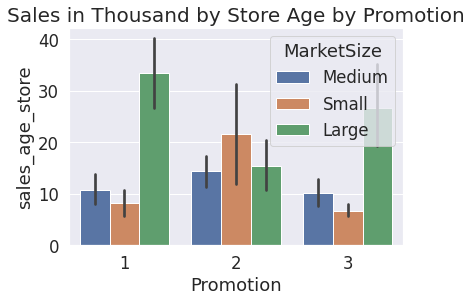

In [14]:
#Sales by Age of Store - By MarketSize
sns.set(font_scale=1.5)
sns.barplot(x='Promotion', y='sales_age_store', data=df, hue='MarketSize')
plt.title("Sales in Thousand by Store Age by Promotion", fontdict={'fontsize': 20})
plt.show()

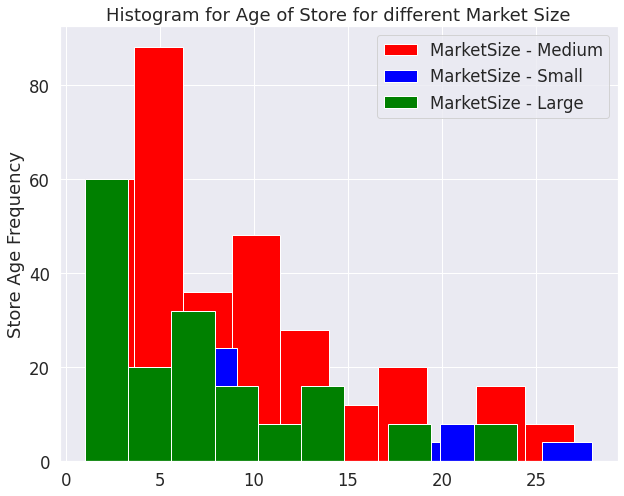

In [15]:
#Plot the distribution of Age of Store by Market Size
fig=plt.figure(figsize=(10,8))
plt.ylabel('Store Age Frequency')
plt.hist(np.array(df[df['MarketSize'] =='Medium']['AgeOfStore']), color='red')
plt.hist(np.array(df[df['MarketSize'] =='Small']['AgeOfStore']), color='blue')
plt.hist(np.array(df[df['MarketSize'] =='Large']['AgeOfStore']), color='green')
plt.legend(['MarketSize - Medium','MarketSize - Small','MarketSize - Large'])
plt.title("Histogram for Age of Store for different Market Size")
plt.show()

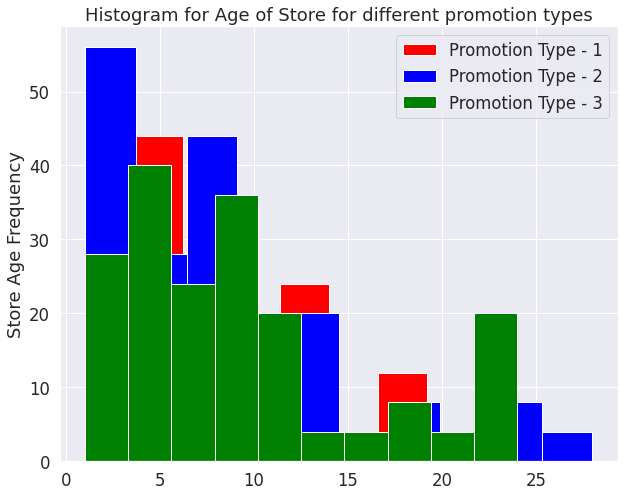

In [16]:
#Plot the distribution of Age of Store by Promotion Type
fig=plt.figure(figsize=(10,8))
plt.ylabel('Store Age Frequency')
plt.hist(np.array(df[df['Promotion'] ==1]['AgeOfStore']), color='red')
plt.hist(np.array(df[df['Promotion'] ==2]['AgeOfStore']), color='blue')
plt.hist(np.array(df[df['Promotion'] ==3]['AgeOfStore']), color='green')
plt.legend(['Promotion Type - 1','Promotion Type - 2','Promotion Type - 3'])
plt.title("Histogram for Age of Store for different promotion types")
plt.show()

Lets look if there is difference in sales in each week

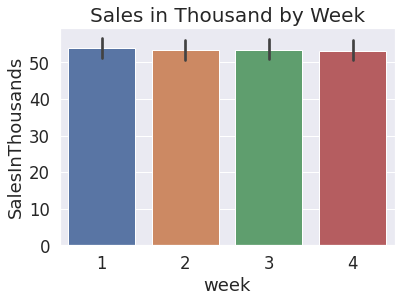

In [17]:
#Sales by Week - overall
sns.set(font_scale=1.5) 
sns.barplot(x='week', y='SalesInThousands', data=df)
plt.title("Sales in Thousand by Week", fontdict={'fontsize': 20})
plt.show()

Sales look same across each week.Lets look for each promotion type as well

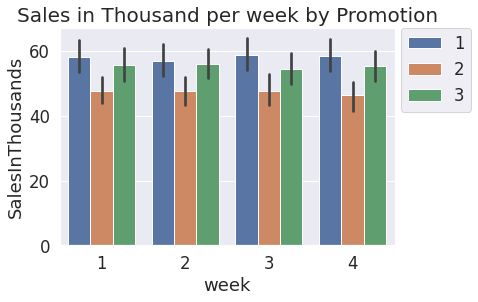

In [18]:
sns.set(font_scale=1.5)
sns.barplot(x='week', y='SalesInThousands', data=df, hue='Promotion')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Sales in Thousand per week by Promotion", fontdict={'fontsize': 20})
plt.show()

Sale is same for all 4 weeks for all promotion types. 

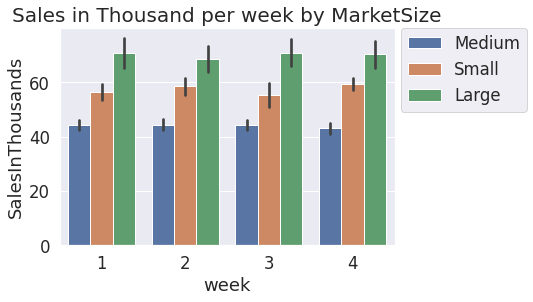

In [19]:
sns.set(font_scale=1.5)
sns.barplot(x='week', y='SalesInThousands', data=df, hue='MarketSize')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Sales in Thousand per week by MarketSize", fontdict={'fontsize': 20})
plt.show()

In terms of marketsize, sales looks the same each week. However, there is some variation for Small Marketsize.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


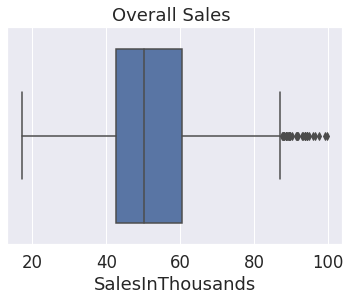

In [20]:
#Distribution of sales - overall
sns.boxplot(df['SalesInThousands'])
plt.title("Overall Sales ")
plt.show()

In [21]:
#Distribution of Sales by Promotion Size
data=[np.array(df[df['Promotion'] ==1]['SalesInThousands']),np.array(df[df['Promotion'] ==2]['SalesInThousands']),np.array(df[df['Promotion'] ==3]['SalesInThousands'])]



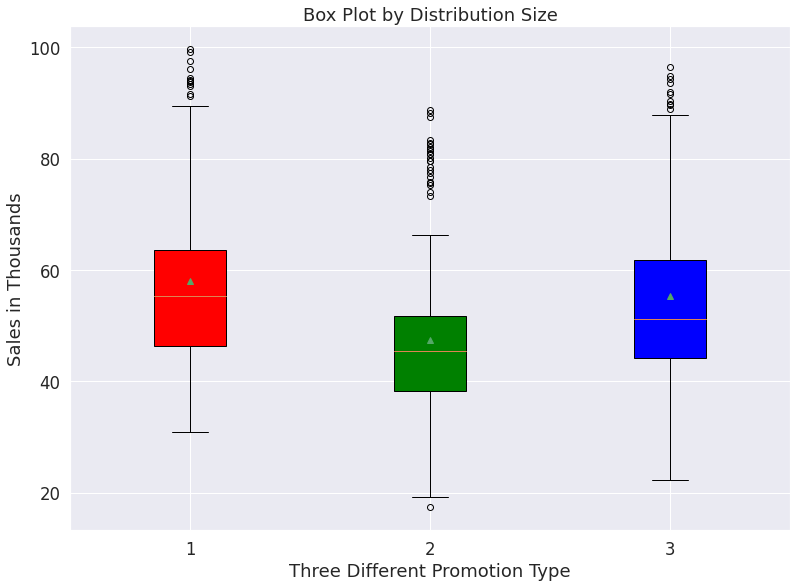

In [22]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1,1])
bp=ax.boxplot(data, vert=True, patch_artist=True, showmeans=True)
ax.set_title("Box Plot by Distribution Size")

#Fill with colors
colors=['red', 'green', 'blue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


#Adding Horizontal Grid Lines
ax.yaxis.grid(True)
ax.set_xlabel('Three Different Promotion Type')
ax.set_ylabel('Sales in Thousands')
plt.show()

In [23]:
df[df['Promotion'] ==1]['MarketID'].count()


172

In [24]:
df[df['Promotion'] ==2]['MarketID'].count()


188

In [25]:
df[df['Promotion'] ==3]['MarketID'].count()

188

#Since we are comparing 3 means, we need to use One Way ANOVA test. There are three assumptions for ANOVA test.
1.The responses for each factor level have a normal population distribution.
2.These distributions have the same variance.
3. The data are independent.

In [26]:
#Checking for homogeneity of variance test
stats.levene(df[df['Promotion'] ==1]['SalesInThousands'],
             df[df['Promotion'] ==2]['SalesInThousands'],
             df[df['Promotion'] ==3]['SalesInThousands'])

LeveneResult(statistic=1.2696787527507418, pvalue=0.2817514565692118)

Since the P-value is greater than 10%, we fail to reject the Null hypothesis that variance are same across all three groups. Lets check for normality assumption. We will start with visual plot

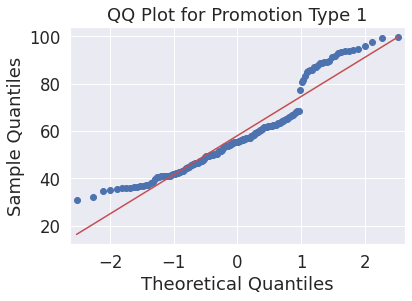

In [27]:
qqplot(np.array(df[df['Promotion'] ==1]['SalesInThousands']), line='s')
plt.title("QQ Plot for Promotion Type 1")
plt.show()

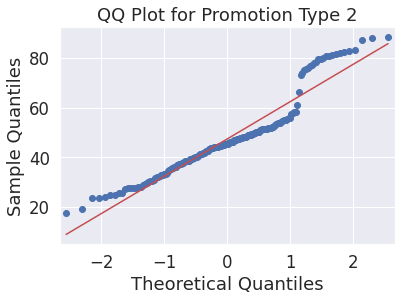

In [28]:
qqplot(np.array(df[df['Promotion'] ==2]['SalesInThousands']), line='s')
plt.title("QQ Plot for Promotion Type 2")
plt.show()

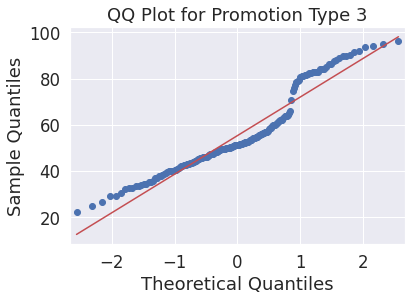

In [29]:
qqplot(np.array(df[df['Promotion'] ==3]['SalesInThousands']), line='s')
plt.title("QQ Plot for Promotion Type 3")
plt.show()

The chart looks normal with no clear outlier. We will perform Normality test to verify the assumption

In [30]:
#Normality Test - Shapiro Wilks Test - Promotion 1
stats.shapiro(df[df['Promotion'] ==1]['SalesInThousands']) 


ShapiroResult(statistic=0.9152998328208923, pvalue=1.977244323825289e-08)

In [31]:
#Normality Test - Shapiro Wilks Test - Promotion 2
stats.shapiro(df[df['Promotion'] ==2]['SalesInThousands']) 


ShapiroResult(statistic=0.9145088791847229, pvalue=5.456262108793908e-09)

In [32]:
#Normality Test - Shapiro Wilks Test - Promotion 3
stats.shapiro(df[df['Promotion'] ==3]['SalesInThousands']) 

ShapiroResult(statistic=0.9207685589790344, pvalue=1.499518376135711e-08)

All the three groups fail the Shapiro Wilks Test. We will do Anderson Darling Test

In [33]:
#. Anderson Darling Test
stats.anderson(df[df['Promotion'] ==1]['SalesInThousands'])

AndersonResult(statistic=4.811285489370562, critical_values=array([0.563, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Since the test statistic is greater compared to all the critical values, we reject the Null Hypothesis

In [34]:
stats.anderson(df[df['Promotion'] ==2]['SalesInThousands'])

AndersonResult(statistic=5.56041600226439, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Since the test statistic is greater compared to all the critical values, we reject the Null Hypothesis

In [35]:
stats.anderson(df[df['Promotion'] ==3]['SalesInThousands'])

AndersonResult(statistic=6.11407995911344, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Since the test statistic is greater compared to all the critical values, we reject the Null Hypothesis.

Since Normality Assumption has failed, we will perform Kruskal Wallis test

In [36]:
stats.kruskal(df[df['Promotion'] ==1]['SalesInThousands'],df[df['Promotion'] ==2]['SalesInThousands'],df[df['Promotion'] ==3]['SalesInThousands'])


KruskalResult(statistic=53.29475169322799, pvalue=2.6741866266697816e-12)

Based on Kruskal Walllis test, we can reject the Null Hypothesis that mean are same across all the groups. 
Since we need to find which group is better, we will perform Tukey Test 

In [37]:
def tukey_test(df, var):
    tukey=pairwise_tukeyhsd(endog=df['SalesInThousands'],groups=df['Promotion'], alpha=0.05)
    print(tukey)
    tukey.plot_simultaneous() 
    title="Comparison between Promotions in " + var
    plt.title(title)
    plt.xlabel("Sales in Thousands")
    plt.ylabel("Promotions")

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2 -10.7696  0.001 -14.774 -6.7652   True
     1      3  -2.7345 0.2447 -6.7389  1.2698  False
     2      3   8.0351  0.001  4.1207 11.9494   True
----------------------------------------------------


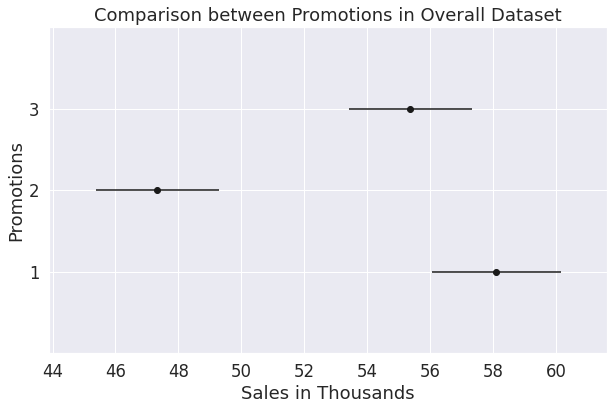

In [38]:
tukey_test(df,"Overall Dataset")

We can conclude that Promotion Type 1 and 3 are very similar.

We will perform the similar analysis by Market Size

In [39]:
#Split by Market Size
df_Medium=df[df['MarketSize'] =='Medium']
df_Small=df[df['MarketSize'] =='Small']
df_Large=df[df['MarketSize'] =='Large']

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -8.5583  0.001 -11.3108 -5.8057   True
     1      3  -2.2037 0.1356  -4.9113  0.5038  False
     2      3   6.3545  0.001   3.7306  8.9785   True
-----------------------------------------------------


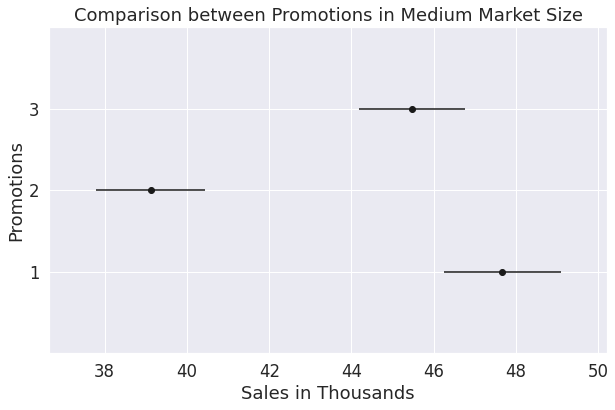

In [40]:
tukey_test(df_Medium,"Medium Market Size")


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2  -9.3519 0.001 -13.6829 -5.0208   True
     1      3  -0.6483   0.9  -4.5579  3.2612  False
     2      3   8.7035 0.001    4.536 12.8711   True
----------------------------------------------------


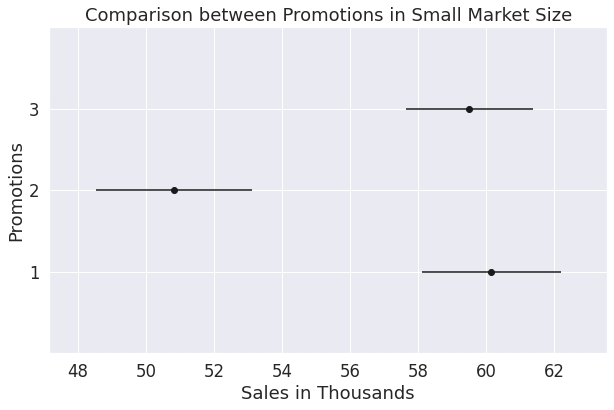

In [41]:
tukey_test(df_Small, "Small Market Size")


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -14.9139  0.001 -21.5284 -8.2993   True
     1      3   1.9681 0.7701  -5.1424  9.0785  False
     2      3  16.8819  0.001   9.9797 23.7842   True
-----------------------------------------------------


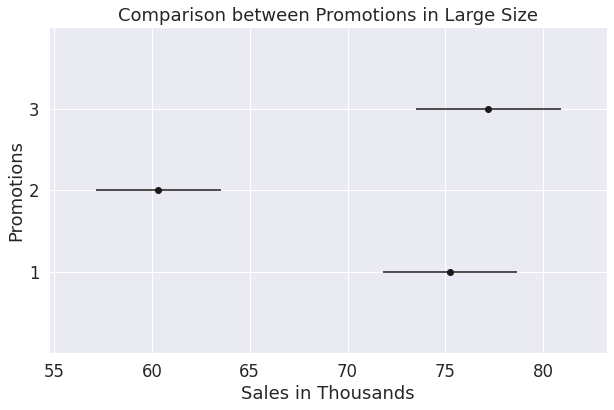

In [42]:
tukey_test(df_Large, "Large Size")

Based on market size, it can be concluded that Promotion type 1 and 3 provide similar Results

* **Conclusion:** Company should concentrate on Promotion Type 1 and 3